In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
mll_gam = rdrive + 'mll/gam_spec/'
mll_nuc = rdrive + 'mll/nuc_conc/'
learn_gam = rdrive + 'scikit/gam_spec/test_0.067_only/'
learn_nuc = rdrive + 'scikit/nuc_conc/test_0.067_only/'

In [4]:
job = 'Job0_unc0.05'#'Job1_unc0.0'
#d1mll113 = pd.read_csv(mll_gam + 'd1_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
job = 'Job1_unc0.0'
#d1mll31 = pd.read_csv(mll_gam + 'd1_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d1mll_auto = pd.read_csv(mll_gam + 'd1_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [7]:
learn_path = learn_gam
knncsv = 'burnup_knn_tset1.0_d1_hpge_mimic_mll.csv'
dtrcsv = 'burnup_dtree_tset1.0_d1_hpge_mimic_mll.csv'
knn_auto = pd.read_csv(learn_path + 'auto/' + knncsv).drop(columns='Unnamed: 0')
dtr_auto = pd.read_csv(learn_path + 'auto/' + dtrcsv).drop(columns='Unnamed: 0')
#knn31 = pd.read_csv(learn_path + 'n31/' + knncsv).drop(columns='Unnamed: 0')
#dtr31 = pd.read_csv(learn_path + 'n31/' + dtrcsv).drop(columns='Unnamed: 0')
#knn113 = pd.read_csv(learn_path + 'n113/' + knncsv).drop(columns='Unnamed: 0')
#dtr113 = pd.read_csv(learn_path + 'n113/' + dtrcsv).drop(columns='Unnamed: 0')

In [16]:
knn_auto.head(2)

,TrueY,kNN,AbsError
0,47320.78,46849.310000,471.470000
1,913.90,926.319525,12.419525


In [17]:
d1mll_auto.head(2)

,sim_idx,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,AvgPowerDensity,ModDensity,UiWeight,pred_idx,...,CDF_LLUnc_0.5,CDF_LogLL_0.1,CDF_LLUnc_0.1,CDF_LogLL_0.01,CDF_LLUnc_0.01,ReactorType_Score,CoolingTime_Error,Enrichment_Error,Burnup_Error,OrigenReactor_Score
0,41,bwr,4125.391152,0.54,1055.5,ge7x7-0,10.0,0.1,1,42,...,8920.066273,-1.530740e+08,2979.043051,-2.768641e+08,396.543266,True,57.543911,0.0,0.0,True
1,29,bwr,2629.718577,0.54,1055.5,ge7x7-0,10.0,0.1,1,3332,...,8898.437285,-1.526201e+08,2995.160799,-2.764184e+08,592.168121,True,83.656156,0.0,0.0,True


In [27]:
algs = ['MLL', 'kNN', 'Dec Tree']
en_lists = ['Auto', '31', '113']
def plotme(df_list, xcol, ycol, errcol, a):
    n = len(df_list)
    fig, axs = plt.subplots(nrows=1, ncols=n, sharex=True, sharey=True, figsize=(6*n,5))
    for i, (ax, df) in enumerate(zip(axs, df_list)):
        #if i == 0:
        #    x = df[xcol]
        #    y = df[ycol]
        #    err = df[errcol]
        #else: 
        #    x = df['TrueY']
        #    y = df['kNN']
        #    err = df['AbsError']
        x = df['TrueY']
        y = df['kNN']
        err = df['AbsError']
        ax.scatter(x, y, c=err, cmap = 'viridis_r')
        ax.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=4)
        #ax.set_title(en_lists[i]+' Energy Windows', fontsize=14)
        ax.set_title('kNN, Auto Energy Windows, Lab HPGe', fontsize=16)
        ax.set_xlabel('TrueY', fontsize=16)
    axs[0].set_ylabel('PredictedY', fontsize=16)
    #fig.suptitle(algs[a] + 'Burnup Predictions', fontsize=16)
    plt.savefig('./plots/true_v_pred.png', bbox_inches='tight', transparent=True)
    plt.show()
    

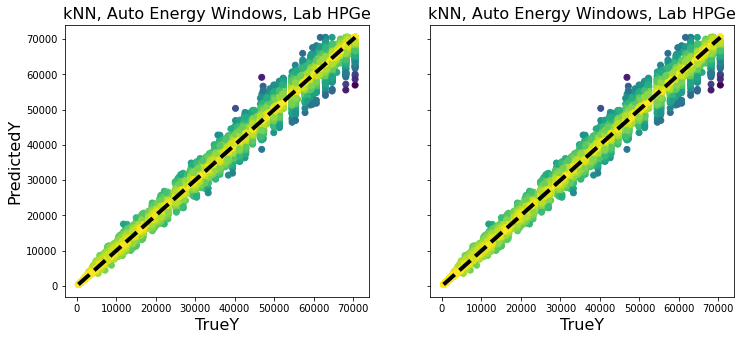

In [28]:
x = 'Burnup'
y = 'pred_Burnup'
err = 'Burnup_Error'
#dflist = [d1mll_auto, d1mll31, d1mll113]
dflist = [knn_auto, knn_auto]#, d1mll113]
plotme(dflist, x, y, err, 0)

In [14]:
x = 'TrueY'
y = 'kNN'
err = 'AbsError'
dflist = [knn_auto, knn31, knn113]
plotme(dflist, x, y, err, 1)

NameError: name 'knn31' is not defined

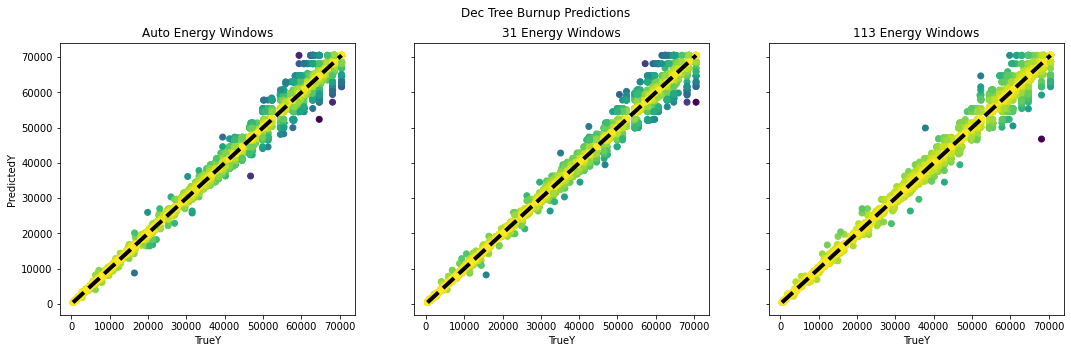

In [80]:
x = 'TrueY'
y = 'DTree'
err = 'AbsError'
dflist = [dtr_auto, dtr31, dtr113]
plotme(dflist, x, y, err, 2)